In [4]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None


class HashTable:
    def __init__(self, size, collision_method='chaining'):
        self.size = size
        self.table = [None] * size
        self.collision_method = collision_method
    
    def _hash(self, key):
        return sum(ord(c) for c in key) % self.size
    
    def insert(self, key, value):
        index = self._hash(key)
        
        if self.collision_method == 'chaining':
            new_node = Node(key, value)
            if not self.table[index]:
                self.table[index] = new_node
            else:
                current = self.table[index]
                while current.next:
                    if current.key == key:
                        current.value = value
                        return
                    current = current.next
                current.next = new_node
                
        elif self.collision_method == 'linear_probing':
            original_index = index
            while self.table[index] is not None:
                if self.table[index].key == key:
                    self.table[index].value = value
                    return
                index = (index + 1) % self.size
                if index == original_index:
                    raise Exception("HashTable is full")
            self.table[index] = Node(key, value)
    
    def get(self, key):
        index = self._hash(key)
        
        if self.collision_method == 'chaining':
            current = self.table[index]
            while current:
                if current.key == key:
                    return current.value
                current = current.next
            return None
        
        elif self.collision_method == 'linear_probing':
            original_index = index
            while self.table[index] is not None:
                if self.table[index].key == key:
                    return self.table[index].value
                index = (index + 1) % self.size
                if index == original_index:
                    break
            return None
    
    def delete(self, key):
        index = self._hash(key)
        
        if self.collision_method == 'chaining':
            current = self.table[index]
            prev = None
            while current:
                if current.key == key:
                    if prev:
                        prev.next = current.next
                    else:
                        self.table[index] = current.next
                    return
                prev = current
                current = current.next
            return
        
        elif self.collision_method == 'linear_probing':
            original_index = index
            while self.table[index] is not None:
                if self.table[index].key == key:
                    self.table[index] = None
                    return
                index = (index + 1) % self.size
                if index == original_index:
                    break
            return


ht_chaining = HashTable(10, collision_method='chaining')
ht_chaining.insert("name", "Alice")
ht_chaining.insert("age", 25)
print(ht_chaining.get("name"))
ht_chaining.delete("age")
print(ht_chaining.get("age"))

ht_probing = HashTable(10, collision_method='linear_probing')
ht_probing.insert("name", "Bob")
ht_probing.insert("age", 30)
print(ht_probing.get("name"))
ht_probing.delete("age")
print(ht_probing.get("age"))

Alice
None
Bob
None


Custom hash collisions: 90
Built-in hash collisions: 90
Custom hash collisions (large dataset): 990
Built-in hash collisions (large dataset): 990


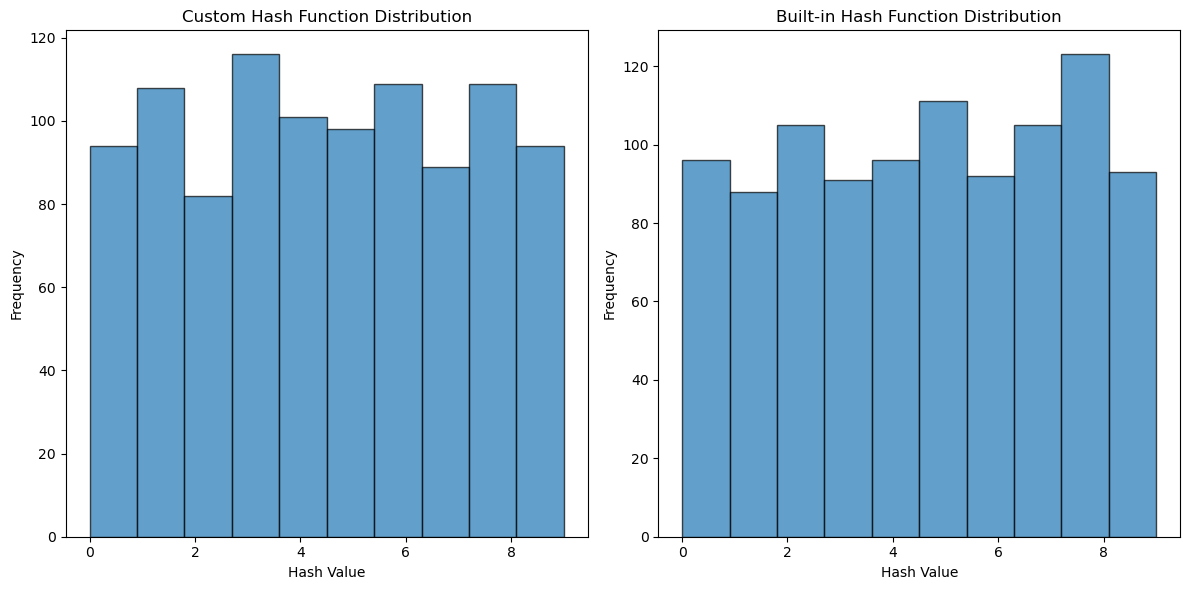

In [3]:
import random
import matplotlib.pyplot as plt

def custom_hash(key):
    return sum(ord(c) for c in key) % 10

def compare_hash_functions():
    keys = [str(random.randint(1, 1000)) for _ in range(100)]
    custom_hash_table = {}
    built_in_hash_table = {}
    custom_collisions = 0
    built_in_collisions = 0
    for key in keys:
        custom_h = custom_hash(key)
        if custom_h in custom_hash_table:
            custom_collisions += 1
        else:
            custom_hash_table[custom_h] = key
        built_in_h = hash(key) % 10
        if built_in_h in built_in_hash_table:
            built_in_collisions += 1
        else:
            built_in_hash_table[built_in_h] = key
    return custom_collisions, built_in_collisions

def large_dataset_collision_analysis():
    keys = [str(random.randint(1, 10000)) for _ in range(1000)]
    custom_hash_table = {}
    built_in_hash_table = {}
    custom_collisions = 0
    built_in_collisions = 0
    for key in keys:
        custom_h = custom_hash(key)
        if custom_h in custom_hash_table:
            custom_collisions += 1
        else:
            custom_hash_table[custom_h] = key
        built_in_h = hash(key) % 10
        if built_in_h in built_in_hash_table:
            built_in_collisions += 1
        else:
            built_in_hash_table[built_in_h] = key
    return custom_collisions, built_in_collisions

def plot_hash_distribution():
    keys = [str(random.randint(1, 1000)) for _ in range(1000)]
    custom_hash_values = [custom_hash(key) for key in keys]
    built_in_hash_values = [hash(key) % 10 for key in keys]
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(custom_hash_values, bins=10, edgecolor='black', alpha=0.7)
    plt.title('Custom Hash Function Distribution')
    plt.xlabel('Hash Value')
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.hist(built_in_hash_values, bins=10, edgecolor='black', alpha=0.7)
    plt.title('Built-in Hash Function Distribution')
    plt.xlabel('Hash Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

custom_collisions, built_in_collisions = compare_hash_functions()
print(f"Custom hash collisions: {custom_collisions}")
print(f"Built-in hash collisions: {built_in_collisions}")

custom_collisions, built_in_collisions = large_dataset_collision_analysis()
print(f"Custom hash collisions (large dataset): {custom_collisions}")
print(f"Built-in hash collisions (large dataset): {built_in_collisions}")

plot_hash_distribution()

In [5]:
class DoublyLinkedListNode:
    def __init__(self, key=None, value=None):
        self.key = key
        self.value = value
        self.prev = None
        self.next = None

class LRUCache:
    def __init__(self, capacity: int):
        self.capacity = capacity
        self.cache = {}
        self.head = DoublyLinkedListNode()
        self.tail = DoublyLinkedListNode()
        self.head.next = self.tail
        self.tail.prev = self.head
    
    def _remove(self, node: DoublyLinkedListNode):
        prev_node = node.prev
        next_node = node.next
        prev_node.next = next_node
        next_node.prev = prev_node
    
    def _insert_at_front(self, node: DoublyLinkedListNode):
        next_node = self.head.next
        self.head.next = node
        node.prev = self.head
        node.next = next_node
        next_node.prev = node
    
    def get(self, key: int) -> int:
        if key not in self.cache:
            return -1
        node = self.cache[key]
        self._remove(node)
        self._insert_at_front(node)
        return node.value
    
    def put(self, key: int, value: int):
        if key in self.cache:
            node = self.cache[key]
            node.value = value
            self._remove(node)
            self._insert_at_front(node)
        else:
            if len(self.cache) >= self.capacity:
                least_recently_used = self.tail.prev
                self._remove(least_recently_used)
                del self.cache[least_recently_used.key]
            new_node = DoublyLinkedListNode(key, value)
            self.cache[key] = new_node
            self._insert_at_front(new_node)

cache = LRUCache(2)
cache.put(1, "A")
cache.put(2, "B")
print(cache.get(1))
cache.put(3, "C")
print(cache.get(2))
cache.put(4, "D")
print(cache.get(1))
print(cache.get(3))
print(cache.get(4))

A
-1
-1
C
D
